# Programming Assignment 3
by John Lindblad and Olle Lindgren

## Introduction (does not need to be included in the report)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

In [2]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
batch_size = 1600

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1601 images belonging to 2 classes.


In [3]:
X_train, Y_train = train_generator.next()
X_train.shape
Y_train[4]

img_width, img_height, img_depth = X_train[0].shape

In [4]:
len(X_train)

1600

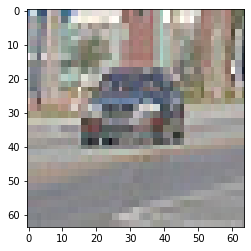

In [5]:
from matplotlib import pyplot as plt
plt.imshow(X_train[4]);

## Part 1: Training a convolutional neural network

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [7]:
val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 576 images belonging to 2 classes.


In [8]:
X_val, Y_val = val_generator.next()
#print(X_val.shape)
#print(X_val[4])
#print(Y_val[4])

In [9]:
len(X_val)

576

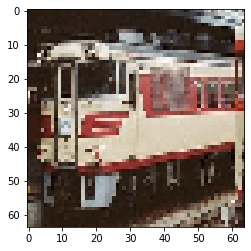

In [10]:
from matplotlib import pyplot as plt
plt.imshow(X_val[4]);

In [11]:
def make_convnet():#x_train, y_train, x_val, y_val):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(img_width, img_height, img_depth))) # 1 or img_depth??
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # 2 classes: car or not car
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    '''
    model.fit(x_train, y_train,
          batch_size=10,
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val));
    '''
    return model

In [12]:
# debugging
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(batch_size)

(1600, 64, 64, 3)
(1600,)
(576, 64, 64, 3)
(576,)
1600


In [13]:
import time
def fit_convnet(model, X_train, Y_train, X_val, Y_val):
    t0 = time.time()
    history = model.fit(X_train, Y_train,
              batch_size=10, # 10 - 200?
              epochs=10, # 10 - 2?
              verbose=1,
              validation_data=(X_val, Y_val))
    model.save_weights('saved_weights') # don't know how to use this yet but it will probably save time
    t1 = time.time()
    print('Training time: {:.2f} sec.'.format(t1-t0))
    return history

In [14]:
model = make_convnet()
history = fit_convnet(model, X_train, Y_train, X_val, Y_val)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1600 samples, validate on 576 samples
Epoch 1/10





1600/1600 [==============================] - 15s 9ms/step - loss: 0.6337 - acc: 0.6369 - val_loss: 0.7335 - val_acc: 0.6042
Epoch 2/10
1600/1600 [==============================] - 14s 9ms/step - loss: 0.5359 - acc: 0.7350 - val_loss: 0.5346 - val_acc: 0.7378
Epoch 3/10
1600/1600 [==============================] - 15s 9ms/step - loss: 0.4809 - acc: 0.7844 - val_loss: 0.5762 - val_acc: 0.7240
Epoch 4/10
1600/1600 [==============================] - 14s 9ms/step - loss: 0.4380 - acc: 0.8062 - val_loss: 0.5586 - val_acc: 0.7535
Epoch 5/10
1600/1600 [==============================] - 14s 9ms/step - loss: 0.3754 - acc: 0.8444 - val_loss: 0.5490 - val_acc: 0.7517
Epoch 6/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.3104 - acc: 0.8756 - val_loss: 0.5526 - val_acc: 0.7656
Epoch 7/10
1600/1600 [=============

In [15]:
# not using this yet
#history.load_weights('saved_weights')

In [16]:
# cell to play around with visualization of training history and "fitting"-curves

import matplotlib.pyplot as plt

def plot_hist(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    return None

In [17]:
# debugging
guesses = model.predict_classes(X_val)
print(guesses[:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]


In [18]:
'''TO-DO:
- create a function doing all this at once in order to make the testing of different augmentaion simpler

''';

## Part 2: Data augmentation

In [19]:
data_gen_augmented = ImageDataGenerator(rescale=1.0/255, brightness_range = (0.0, 1.0))

In [20]:
train_generator = data_gen_augmented.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1601 images belonging to 2 classes.


In [21]:
X_train, Y_train = train_generator.next()

In [22]:
model = make_convnet()
history = fit_convnet(model, X_train, Y_train, X_val, Y_val)

Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 15s 9ms/step - loss: 0.6664 - acc: 0.6156 - val_loss: 0.5964 - val_acc: 0.6823
Epoch 2/10
1600/1600 [==============================] - 15s 9ms/step - loss: 0.5887 - acc: 0.6925 - val_loss: 0.7422 - val_acc: 0.6771
Epoch 3/10
1600/1600 [==============================] - 14s 8ms/step - loss: 0.5295 - acc: 0.7425 - val_loss: 0.8129 - val_acc: 0.6684
Epoch 4/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5032 - acc: 0.7644 - val_loss: 0.5657 - val_acc: 0.7361
Epoch 5/10
1600/1600 [==============================] - 15s 9ms/step - loss: 0.4699 - acc: 0.7762 - val_loss: 0.6372 - val_acc: 0.7569
Epoch 6/10
1600/1600 [==============================] - 16s 10ms/step - loss: 0.4278 - acc: 0.7912 - val_loss: 0.6938 - val_acc: 0.7309
Epoch 7/10
1600/1600 [==============================] - 13s 8ms/step - loss: 0.3879 - acc: 0.8187 - val_loss: 0.6486 - val_acc: 0.7778
Epoch 8

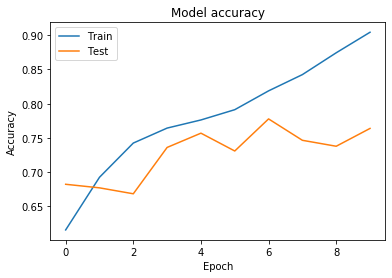

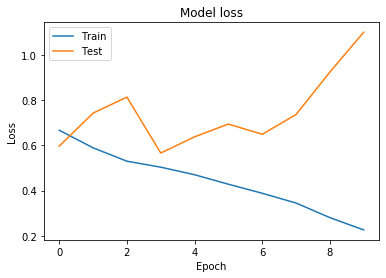

In [23]:
plot_hist(history)

## Optional task: Run your code on a high-performance machine

In [24]:
# NOT STARTED YET

## Interlude: Applying a pre-trained convolutional neural network (should probably not be included in report)

In [25]:
# importing the VGG-16 model
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


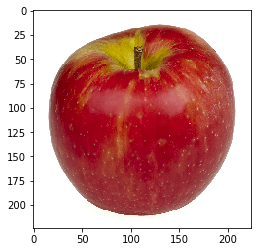

In [26]:
# loading an image
img = load_img('apple.jpg', target_size=(224,224))
plt.imshow(img);

In [27]:
# converting to numpy
from keras.preprocessing.image import img_to_array
arr = img_to_array(img);

# process the array
proc_arr = preprocess_input(arr)

# reshape
your_image = proc_arr.reshape(1, 224, 224, 3)

In [28]:
pred = vggmodel.predict(your_image)
print('Predicted:', decode_predictions(pred, top=10)[0])

Predicted: [('n07742313', 'Granny_Smith', 0.57527566), ('n07768694', 'pomegranate', 0.11990318), ('n07753113', 'fig', 0.079739615), ('n07753592', 'banana', 0.059216265), ('n07747607', 'orange', 0.048092417), ('n03134739', 'croquet_ball', 0.02308206), ('n07749582', 'lemon', 0.017987078), ('n07745940', 'strawberry', 0.01583414), ('n03720891', 'maraca', 0.0074312165), ('n12620546', 'hip', 0.003751107)]


## Part 3: Using VGG-16 as a feature extractor

In [29]:
# imports
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

# random setup stuff
img_size=64
imgdir = 'pa3_images'
batch_size=1600

In [30]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

In [31]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [32]:
import numpy as np

def create_vgg16_features(directory, filename):
    
    val_generator = vgg_data_gen.flow_from_directory(
        imgdir + directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    
    X_set, Y_set = val_generator.next()
    
    #img_width, img_height, img_depth = X_train[0].shape
    
    cnn_features = feature_extractor.predict(X_set) 
    
    #print(cnn_features)
    
    with open(filename, 'wb') as f:
      np.save(f, cnn_features)
    
    return None

In [33]:
dir_val = '/validation'
dir_train = '/train'
file_val = 'val_file'
file_train = 'train_file'
create_vgg16_features(dir_train, file_train)

Found 1601 images belonging to 2 classes.


In [34]:
create_vgg16_features(dir_val, file_val)

Found 576 images belonging to 2 classes.


In [35]:
def train_on_cnnfeatures():
    
    with open('train_file', 'rb') as f:
        train_data = np.load(f)
    
    with open('val_file', 'rb') as f:
        val_data = np.load(f)
        
    
    
    return None

In [36]:
train_on_cnnfeatures()